In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Optional: set styles for better visualizations
sns.set(style="whitegrid")


In [109]:
# Load the dataset (replace the path with your actual file path)
data = pd.read_excel('/Users/surajdalal/Downloads/EMAT.xlsx')

# Preview the first few rows of the dataset
data.tail()

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
1405,2024-0498-IND,No,tec-tra-roa-roa,Technological,Transport,Road,Road,NaN,NaN,IND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-07-16,2024-07-16
1406,2024-0561-IND,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,IND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-01,2024-08-23
1407,2024-0624-IND,No,nat-hyd-flo-fla,Natural,Hydrological,Flood,Flash flood,NaN,NaN,IND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-23,2024-08-23
1408,2024-0627-IND,No,nat-hyd-mmw-lan,Natural,Hydrological,Mass movement (wet),Landslide (wet),NaN,NaN,IND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-22,2024-08-23
1409,2024-0634-IND,No,tec-ind-exp-exp,Technological,Industrial accident,Explosion (Industrial),Explosion (Industrial),NaN,Pharmaceutical factory,IND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-23,2024-08-23


In [110]:
print(data.columns)

Index(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal',
       'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage ('000 US$)', 'Total Damage, Adjusted ('000 US$)', 'CPI',
       'Admin Units', 'Entry Date', 'Last Update'],
      dtype='object')


In [111]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Fill missing values or drop rows with too many missing values
data_clean = data.dropna(subset=['Disaster Type'])

# Convert relevant columns to numeric (if needed)
data_clean['Total Deaths'] = pd.to_numeric(data_clean['Total Deaths'], errors='coerce')

Missing values in each column:
DisNo.                                          0
Historic                                        0
Classification Key                              0
Disaster Group                                  0
Disaster Subgroup                               0
Disaster Type                                   0
Disaster Subtype                                0
External IDs                                 1352
Event Name                                   1080
ISO                                             0
Country                                         0
Subregion                                       0
Region                                          0
Location                                       25
Origin                                       1178
Associated Types                             1272
OFDA/BHA Response                               0
Appeal                                          0
Declaration                                     0
AID Contribution ('

In [112]:
# Renaming the column with special characters using rename() and bracket notation
data_clean.rename(columns={"Total Damage ('000 US$)": "Total_Damage_USD"}, inplace=True)

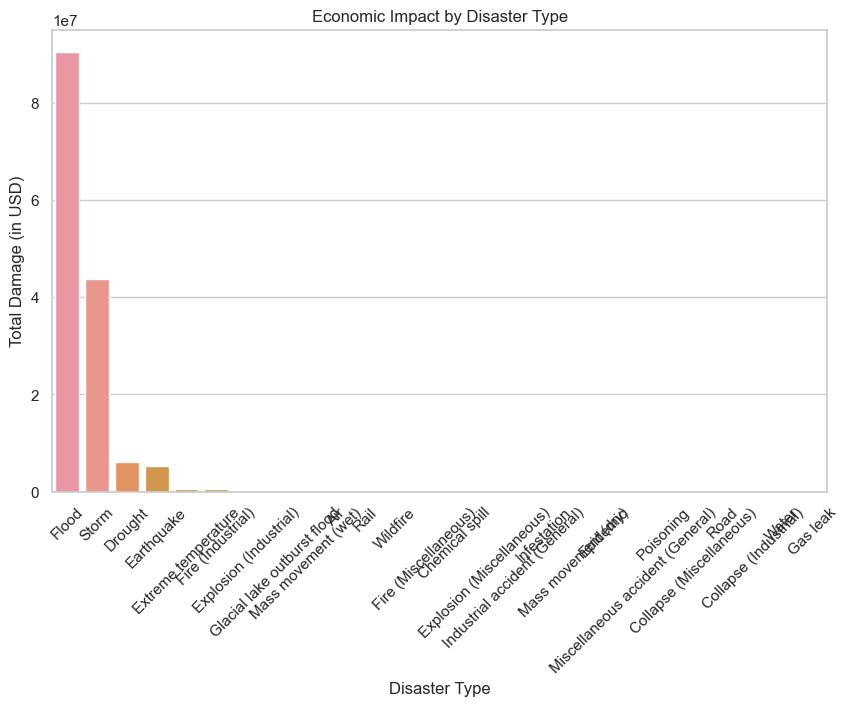

In [113]:
# Group by disaster type and sum the total economic damage
economic_impact_by_disaster = data_clean.groupby('Disaster Type')['Total_Damage_USD'].sum().sort_values(ascending=False)

# Plot the economic damage for each disaster type
plt.figure(figsize=(10,6))
sns.barplot(x=economic_impact_by_disaster.index, y=economic_impact_by_disaster.values)
plt.title('Economic Impact by Disaster Type')
plt.ylabel('Total Damage (in USD)')
plt.xticks(rotation=45)
plt.show()

In [114]:
# Inspect unique values in the 'Total Damage (in USD)' column
# Importing pandas
import pandas as pd

# Set pandas to display numbers in regular form (non-scientific notation)
pd.set_option('display.float_format', '{:.2f}'.format)

unique_values = data_clean['Total_Damage_USD'].unique()
print(unique_values)  # Display the first 10 unique values


[        nan 3.20000e+05 2.50000e+05 7.00000e+05 6.25420e+05 1.20000e+05
 2.50000e+04 5.60000e+04 5.10000e+05 9.00000e+04 2.00000e+03 3.50000e+04
 5.00000e+05 1.44000e+05 3.08000e+05 1.00000e+05 2.72943e+05 2.76100e+05
 5.00000e+03 5.45000e+05 9.29200e+05 7.15000e+04 1.80000e+04 1.30000e+04
 5.80000e+05 2.20000e+06 4.17000e+04 2.80000e+04 1.12800e+05 6.00000e+04
 1.18000e+05 4.00000e+04 5.78500e+04 1.82100e+05 6.90000e+04 7.00000e+06
 2.80000e+05 1.75000e+05 1.91000e+04 4.50000e+03 2.58000e+05 4.63000e+04
 2.52000e+02 9.04000e+04 1.50030e+06 3.60000e+04 8.50000e+04 1.76000e+04
 9.80000e+02 5.42400e+05 3.70000e+04 7.10000e+04 1.92000e+04 1.53800e+05
 1.00000e+04 4.69000e+05 5.28600e+05 2.00000e+04 2.40000e+03 4.70000e+05
 2.50000e+06 4.30000e+04 1.73000e+05 6.91500e+05 5.88000e+05 2.62300e+06
 1.16924e+05 2.60000e+04 1.03000e+05 4.16000e+02 3.07720e+04 9.10722e+05
 1.60000e+04 4.00000e+05 1.69000e+05 1.02280e+06 2.76000e+05 5.00000e+04
 2.30000e+06 2.30000e+04 3.33000e+06 4.10000e+05 4.

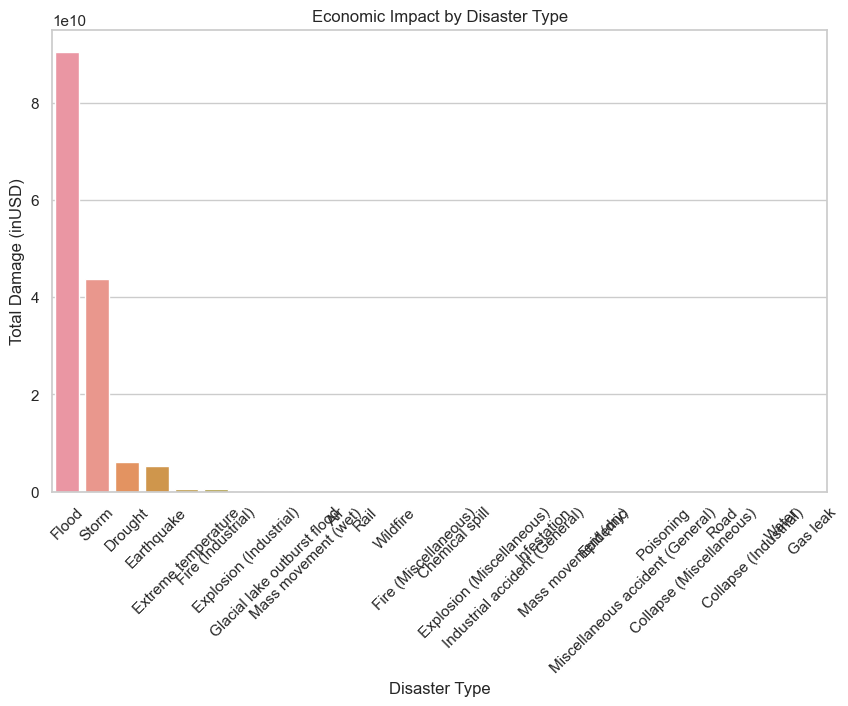

In [115]:
# Group by disaster type and sum the total economic damage
economic_impact_by_disaster = data_clean.groupby('Disaster Type')['Total_Damage_USD'].sum().sort_values(ascending=False)

# Plot the economic damage for each disaster type
plt.figure(figsize=(10,6))
sns.barplot(x=economic_impact_by_disaster.index, y=economic_impact_by_disaster.values*1000)
plt.title('Economic Impact by Disaster Type')
plt.ylabel('Total Damage (inUSD)')
plt.xticks(rotation=45)
plt.show()

In [116]:
data_clean['Total_Damage_USD']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1405   NaN
1406   NaN
1407   NaN
1408   NaN
1409   NaN
Name: Total_Damage_USD, Length: 1410, dtype: float64

In [117]:
data_clean['Year'] = data_clean['DisNo.'].str[:4]

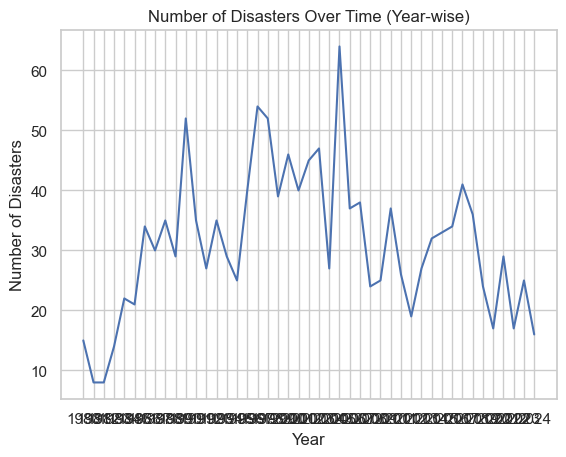

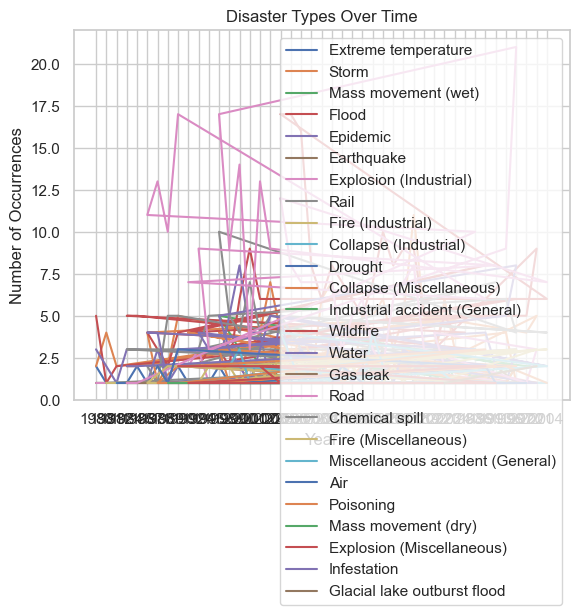

In [118]:
# Group by year and count disaster occurrences
disaster_by_year = data_clean.groupby('Year')['Disaster Type'].count()

# Plot the number of disasters by year
plt.figure()
sns.lineplot(x=disaster_by_year.index, y=disaster_by_year.values)
plt.title('Number of Disasters Over Time (Year-wise)')
plt.ylabel('Number of Disasters')
plt.xlabel('Year')
plt.show()

# Check for trends in specific disaster types over time
disaster_types = data_clean['Disaster Type'].unique()
for disaster in disaster_types:
    disaster_trend = data_clean[data_clean['Disaster Type'] == disaster].groupby('Year').count()['Disaster Type']
    plt.plot(disaster_trend.index, disaster_trend.values, label=disaster)

plt.title('Disaster Types Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
plt.legend()
plt.show()


In [119]:
print(data_clean.columns)

Index(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal',
       'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total_Damage_USD', 'Total Damage, Adjusted ('000 US$)', 'CPI',
       'Admin Units', 'Entry Date', 'Last Update', 'Year'],
      dtype='object')


In [120]:
# Renaming the column with special characters using rename() and bracket notation
data_clean.rename(columns={"Insured Damage, Adjusted ('000 US$)": "Insured Damage"}, inplace=True)

/var/folders/w8/bvg5ltn90wg_h0ntnw6pxlfm0000gn/T/ipykernel_84926/684081562.py:6: RuntimeWarning: invalid value encountered in double_scalars
  damage_comparison = data_clean.groupby('Disaster Type').apply(lambda x: x['Insured Damage'].sum() / x['Total_Damage_USD'].sum()).sort_values(ascending=False)


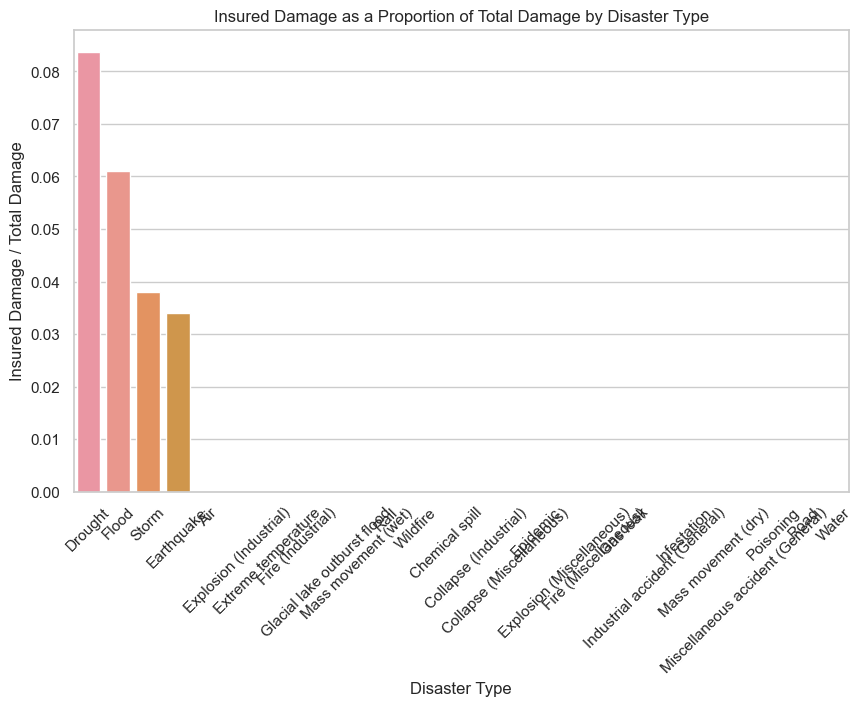

In [121]:
# Ensure both 'Insured Damage' and 'Total Damage' columns exist and are numeric
data_clean['Insured Damage'] = pd.to_numeric(data_clean['Insured Damage'], errors='coerce')
data_clean['Total_Damage_USD'] = pd.to_numeric(data_clean['Total_Damage_USD'], errors='coerce')

# Group by disaster type and calculate the ratio of insured damage to total damage
damage_comparison = data_clean.groupby('Disaster Type').apply(lambda x: x['Insured Damage'].sum() / x['Total_Damage_USD'].sum()).sort_values(ascending=False)

# Plot the insured vs total damage comparison
plt.figure(figsize=(10,6))
sns.barplot(x=damage_comparison.index, y=damage_comparison.values)
plt.title('Insured Damage as a Proportion of Total Damage by Disaster Type')
plt.ylabel('Insured Damage / Total Damage')
plt.xticks(rotation=45)
plt.show()


In [122]:
print(data_clean.columns)

Index(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal',
       'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage', 'Total_Damage_USD',
       'Total Damage, Adjusted ('000 US$)', 'CPI', 'Admin Units', 'Entry Date',
       'Last Update', 'Year'],
      dtype='object')


In [123]:
data_clean['Total_Damage_USD']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1405   NaN
1406   NaN
1407   NaN
1408   NaN
1409   NaN
Name: Total_Damage_USD, Length: 1410, dtype: float64

In [124]:
df = data_clean.dropna(subset=['Total_Damage_USD'])

In [125]:
df

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),Insured Damage,Total_Damage_USD,"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update,Year
6,1980-0074-IND,Yes,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,IND,...,NaN,NaN,NaN,320000.00,1183188.00,27.05,NaN,2003-07-01,2023-09-25,1980
18,1981-0063-IND,Yes,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,IND,...,NaN,NaN,NaN,250000.00,837783.00,29.84,NaN,2003-07-01,2023-09-25,1981
23,1982-0087-IND,Yes,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,IND,...,NaN,NaN,NaN,700000.00,2210271.00,31.67,NaN,2003-07-01,2023-09-25,1982
25,1982-0120-IND,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,IND,...,NaN,NaN,NaN,625420.00,1974783.00,31.67,NaN,2003-07-01,2023-09-25,1982
27,1982-0313-IND,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,IND,...,NaN,NaN,NaN,120000.00,378904.00,31.67,NaN,2008-04-03,2023-09-25,1982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,2021-0316-IND,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,IND,...,NaN,NaN,NaN,100000.00,112449.00,88.93,"[{""adm1_code"":1491,""adm1_name"":""Gujarat""},{""ad...",2021-06-22,2023-09-25,2021
1338,2021-0435-IND,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,IND,...,NaN,NaN,NaN,3100000.00,3485908.00,88.93,"[{""adm1_code"":1490,""adm1_name"":""Goa""},{""adm1_c...",2021-07-26,2023-09-25,2021
1358,2022-0293-IND,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,IND,...,NaN,NaN,NaN,4200000.00,4372889.00,96.05,NaN,2022-05-16,2023-09-25,2022
1378,2023-0359-IND,No,nat-hyd-flo-fla,Natural,Hydrological,Flood,Flash flood,NaN,NaN,IND,...,NaN,NaN,NaN,3000.00,3000.00,100.00,"[{""adm1_code"":1489,""adm1_name"":""Delhi""},{""adm1...",2023-06-29,2023-09-26,2023


In [126]:
# Group by year and sum the total damage
yearwise_damage = df.groupby('Year')['Total_Damage_USD'].sum().reset_index()

# Rename the columns for clarity
yearwise_damage.columns = ['Year', 'Total_Damage_USD']

# Display the new DataFrame
print(yearwise_damage)


    Year  Total_Damage_USD
0   1980         320000.00
1   1981         250000.00
2   1982        1445420.00
3   1983         591000.00
4   1984         127000.00
5   1985         952000.00
6   1986         654043.00
7   1987         545000.00
8   1988        1031700.00
9   1990        2962500.00
10  1991         318000.00
11  1992         308950.00
12  1993        7880000.00
13  1994         194100.00
14  1995         313052.00
15  1996        2272680.00
16  1997         281000.00
17  1998        1007600.00
18  1999        2994400.00
19  2000        1495500.00
20  2001        2984924.00
21  2002         961910.00
22  2003         613000.00
23  2004        3798800.00
24  2005        7650000.00
25  2006        3390000.00
26  2007         376151.00
27  2008         170000.00
28  2009        2934000.00
29  2010        2149000.00
30  2011        2034625.00
31  2012         244000.00
32  2013        2377471.00
33  2014       23465000.00
34  2015        6949000.00
35  2016        2574000.00
3

In [127]:
df['Total_Damage_USD'] /= 1000000
df.tail()

/var/folders/w8/bvg5ltn90wg_h0ntnw6pxlfm0000gn/T/ipykernel_84926/1755017793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Damage_USD'] /= 1000000


,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),Insured Damage,Total_Damage_USD,"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update,Year
1335,2021-0316-IND,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,IND,...,NaN,NaN,NaN,0.10,112449.00,88.93,"[{""adm1_code"":1491,""adm1_name"":""Gujarat""},{""ad...",2021-06-22,2023-09-25,2021
1338,2021-0435-IND,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,IND,...,NaN,NaN,NaN,3.10,3485908.00,88.93,"[{""adm1_code"":1490,""adm1_name"":""Goa""},{""adm1_c...",2021-07-26,2023-09-25,2021
1358,2022-0293-IND,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,IND,...,NaN,NaN,NaN,4.20,4372889.00,96.05,NaN,2022-05-16,2023-09-25,2022
1378,2023-0359-IND,No,nat-hyd-flo-fla,Natural,Hydrological,Flood,Flash flood,NaN,NaN,IND,...,NaN,NaN,NaN,0.00,3000.00,100.00,"[{""adm1_code"":1489,""adm1_name"":""Delhi""},{""adm1...",2023-06-29,2023-09-26,2023
1391,2023-0792-IND,No,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Tropical storm 'Michaung',IND,...,NaN,NaN,NaN,0.12,125000.00,100.00,NaN,2023-12-06,2024-02-12,2023


In [128]:
df.rename(columns={"Total Damage, Adjusted ('000 US$)": "Total Adjusted Damage"}, inplace=True)

/Users/surajdalal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [129]:
df['Total Adjusted Damage']*= 82000
df.tail()

/var/folders/w8/bvg5ltn90wg_h0ntnw6pxlfm0000gn/T/ipykernel_84926/2869461603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Adjusted Damage']*= 82000


,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),Insured Damage,Total_Damage_USD,Total Adjusted Damage,CPI,Admin Units,Entry Date,Last Update,Year
1335,2021-0316-IND,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,IND,...,NaN,NaN,NaN,0.10,9220818000.00,88.93,"[{""adm1_code"":1491,""adm1_name"":""Gujarat""},{""ad...",2021-06-22,2023-09-25,2021
1338,2021-0435-IND,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,IND,...,NaN,NaN,NaN,3.10,285844456000.00,88.93,"[{""adm1_code"":1490,""adm1_name"":""Goa""},{""adm1_c...",2021-07-26,2023-09-25,2021
1358,2022-0293-IND,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,IND,...,NaN,NaN,NaN,4.20,358576898000.00,96.05,NaN,2022-05-16,2023-09-25,2022
1378,2023-0359-IND,No,nat-hyd-flo-fla,Natural,Hydrological,Flood,Flash flood,NaN,NaN,IND,...,NaN,NaN,NaN,0.00,246000000.00,100.00,"[{""adm1_code"":1489,""adm1_name"":""Delhi""},{""adm1...",2023-06-29,2023-09-26,2023
1391,2023-0792-IND,No,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Tropical storm 'Michaung',IND,...,NaN,NaN,NaN,0.12,10250000000.00,100.00,NaN,2023-12-06,2024-02-12,2023


In [130]:
# Group by year and sum the total adjusted damage
yearwise = df.groupby('Year')['Total Adjusted Damage'].sum().reset_index()

# Rename the columns for clarity
yearwise.columns = ['Year', 'TTotal Adjusted Damage']

# Display the new DataFrame
print(yearwise)

    Year  TTotal Adjusted Damage
0   1980          97021416000.00
1   1981          68698206000.00
2   1982         374244556000.00
3   1983         148257558000.00
4   1984          30545410000.00
5   1985         221130220000.00
6   1986         149091006000.00
7   1987         119842672000.00
8   1988         217976828000.00
9   1990         566513072000.00
10  1991          58339802000.00
11  1992          55013226000.00
12  1993        1362926264000.00
13  1994          32718410000.00
14  1995          51329540000.00
15  1996         362028360000.00
16  1997          43739620000.00
17  1998         154442572000.00
18  1999         449147210000.00
19  2000         216991106000.00
20  2001         421197100000.00
21  2002         133614162000.00
22  2003          83258700000.00
23  2004         502506332000.00
24  2005         978737896000.00
25  2006         420161112000.00
26  2007          45327550000.00
27  2008          19728298000.00
28  2009         341701380000.00
29  2010  

In [136]:
# Group by year and disaster, then sum the total deaths
year_disaster_wise = df.groupby(['Year', 'Disaster Type'])['Total Deaths'].sum().reset_index()

# Rename the columns for clarity
year_disaster_wise.columns = ['Year', 'Disaster Type', 'Total Deaths']
pd.set_option('display.max_rows', None)
# Display the new DataFrame
print(year_disaster_wise)

    Year                Disaster Type  Total Deaths
0   1980                        Flood       1600.00
1   1981                        Flood        553.00
2   1982                        Flood        932.00
3   1982                        Storm        744.00
4   1983                        Storm        682.00
5   1984                        Flood        245.00
6   1984                        Storm        524.00
7   1984                     Wildfire          0.00
8   1985          Extreme temperature        225.00
9   1985                        Flood       1298.00
10  1986                   Earthquake          6.00
11  1986                        Flood        237.00
12  1986                        Storm         13.00
13  1987                        Flood       1200.00
14  1988                   Earthquake        382.00
15  1988                        Flood       1250.00
16  1988                        Storm         74.00
17  1990       Explosion (Industrial)         30.00
18  1990    